In [1]:
!ls
from google.colab import drive
drive.mount('/content/drive')

drive  sample_data
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "./drive/MyDrive/CS786_Project/"

/content/drive/MyDrive/CS786_Project


In [3]:
#!wget https://openscholar.huji.ac.il/sites/default/files/agri_economics/files/rawdataexperiment1sorted.zip

In [4]:
#!unzip rawdataexperiment1sorted.zip

In [5]:
import pandas as pd
import numpy as np

In [6]:
!ls

 combined.csv
'Copy of CS786_Project_Psych_feat.ipynb'
 CS786_Project.ipynb
 CS786_Project_Psych_feat.ipynb
 dxcomp_data_2.csv
 dxcomp_data.csv
'DXcomp Experiment 1 Distribution Data Appended.csv'
'DXcomp Experiment2 (Estimation Set) Distribution Data.csv'
 DXcomp_Experiment3_DistributionData.csv
 exp1.csv
 exp2.csv
 exp3.csv
 exp3.gsheet
 exp3_new.csv
 RawDataExperiment1sorted.csv
 rawdataexperiment1sorted.zip
 rawdataexperiment1sorted.zip.1
 rawdataexperiment1sorted.zip.2
 rawdataexperiment1sorted.zip.3
 rawdataexperiment1sorted.zip.4
 rawdataexperiment1sorted.zip.5
 rawdataexperiment1sorted.zip.6
 rawdataexperiment1sorted.zip.7
 rawdataexperiment1sorted.zip.8
 rawdataexperiment1sorted.zip.9
 test.csv
 test_new.csv
 train.csv


In [7]:
df = pd.read_csv("train.csv")

In [8]:
test_df = pd.read_csv("test_new.csv")

In [9]:
df.head()

,Problem,Ha,pHa,La,Hb,pHb,Lb,Manipulation,Amb,LotShape,...,ssdB,dSD,SignMax,RatioMin,pBetter0,pBetterFB,pBetterU,pBetterS,pBetterSFB,Dom
0,1,3,1.00,3,4,0.8,0,abstract,0,-,...,0.4,1.600000,1,0.00,-9.090909e-02,-1.000000,3.939394e-01,0.393939,7.000000,1
1,2,3,0.25,0,4,0.2,0,abstract,0,-,...,0.4,0.300962,1,1.00,-1.313131e-01,-0.578947,-6.969697e-01,0.878788,1.421053,1
2,3,-1,1.00,-1,0,0.5,-2,abstract,0,-,...,0.5,1.000000,0,0.50,-3.122502e-17,0.052632,-3.122502e-17,-0.696970,-13.000000,1
3,4,1,1.00,1,2,0.5,0,abstract,0,-,...,0.5,1.000000,1,0.00,-3.122502e-17,0.052632,-3.122502e-17,0.696970,13.000000,1
4,5,-3,1.00,-3,0,0.2,-4,abstract,0,-,...,0.4,1.600000,0,0.75,9.090909e-02,1.000000,-3.939394e-01,-0.393939,-7.000000,1


In [10]:
test_df.head()

,Problem,Ha,pHa,La,Hb,pHb,Lb,Manipulation,Amb,LotShape,...,ssdB,dSD,SignMax,RatioMin,pBetter0,pBetterFB,pBetterU,pBetterS,pBetterSFB,Dom
0,91,7,1.00,7,16,0.10,10,abstract,0,-,...,0.000000,1.800000,1,0.700000,-0.959596,-19.000000,-0.959596,0.000000,-1.110000e-16,0
1,92,8,0.80,-37,102,0.20,-29,abstract,0,-,...,0.800000,34.400000,1,0.783784,0.050505,0.368421,-0.777778,1.000000,1.436842e+01,0
2,93,5,1.00,5,103,0.10,-9,StPb,1,L-skew,...,0.600000,33.631235,1,0.555556,0.070707,1.000000,-0.919192,1.000000,1.900000e+01,0
3,94,7,1.00,7,6,0.75,1,abstract,0,-,...,0.000000,2.165064,1,0.142857,0.717172,15.000000,0.838384,0.000000,-1.110000e-16,0
4,95,-3,0.05,-9,42,0.40,-24,StPb,0,L-skew,...,0.974359,31.886306,1,0.375000,-0.272727,-0.272727,-0.737374,-0.575758,-5.757576e-01,0


In [11]:
test_df.shape

(60, 76)

In [12]:
df.columns

Index(['Problem', 'Ha', 'pHa', 'La', 'Hb', 'pHb', 'Lb', 'Manipulation', 'Amb',
       'LotShape', 'LotNum', 'Corr', 'av1', 'ap1', 'av2', 'ap2', 'bv1', 'bp1',
       'bv2', 'bp2', 'bv3', 'bp3', 'bv4', 'bp4', 'bv5', 'bp5', 'bv6', 'bp6',
       'bv7', 'bp7', 'bv8', 'bp8', 'bv9', 'bp9', 'bv10', 'bp10', 'B1', 'B2',
       'B3', 'B4', 'B5', 'evA', 'evB', 'minA', 'minB', 'dMins', 'maxA', 'maxB',
       'dMaxs', 'UEVa', 'UEVb', 'dEV0', 'dEV', 'dEVfb', 'dUniEV', 'EVsa',
       'EVsb', 'dSignEV', 'dMins.1', 'sdA', 'sdB', 'countA', 'countB', 'usdA',
       'usdB', 'ssdA', 'ssdB', 'dSD', 'SignMax', 'RatioMin', 'pBetter0',
       'pBetterFB', 'pBetterU', 'pBetterS', 'pBetterSFB', 'Dom'],
      dtype='object')

In [13]:
df["pred_rate"] = 0.0
df["class"] = 0

test_df["pred_rate"] = 0.0
test_df["class"] = 0

In [14]:
df_columns = list(df.columns)

In [15]:
B1_idx = df_columns.index("B1")

In [16]:
new_df = df.reindex(df.index.repeat(5))

new_test_df = test_df.reindex(test_df.index.repeat(5))


In [17]:
new_df = new_df.reset_index(drop=True)

new_test_df = new_test_df.reset_index(drop=True)

In [18]:
new_df

,Problem,Ha,pHa,La,Hb,pHb,Lb,Manipulation,Amb,LotShape,...,SignMax,RatioMin,pBetter0,pBetterFB,pBetterU,pBetterS,pBetterSFB,Dom,pred_rate,class
0,1,3,1.0,3,4,0.80,0,abstract,0,-,...,1,0.0,-0.090909,-1.0,0.393939,0.393939,7.0,1,0.0,0
1,1,3,1.0,3,4,0.80,0,abstract,0,-,...,1,0.0,-0.090909,-1.0,0.393939,0.393939,7.0,1,0.0,0
2,1,3,1.0,3,4,0.80,0,abstract,0,-,...,1,0.0,-0.090909,-1.0,0.393939,0.393939,7.0,1,0.0,0
3,1,3,1.0,3,4,0.80,0,abstract,0,-,...,1,0.0,-0.090909,-1.0,0.393939,0.393939,7.0,1,0.0,0
4,1,3,1.0,3,4,0.80,0,abstract,0,-,...,1,0.0,-0.090909,-1.0,0.393939,0.393939,7.0,1,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,90,10,1.0,10,31,0.75,-49,abstract,0,-,...,1,0.0,-0.030303,-1.0,0.393939,0.434343,9.0,0,0.0,0
446,90,10,1.0,10,31,0.75,-49,abstract,0,-,...,1,0.0,-0.030303,-1.0,0.393939,0.434343,9.0,0,0.0,0
447,90,10,1.0,10,31,0.75,-49,abstract,0,-,...,1,0.0,-0.030303,-1.0,0.393939,0.434343,9.0,0,0.0,0
448,90,10,1.0,10,31,0.75,-49,abstract,0,-,...,1,0.0,-0.030303,-1.0,0.393939,0.434343,9.0,0,0.0,0


In [19]:
new_test_df

,Problem,Ha,pHa,La,Hb,pHb,Lb,Manipulation,Amb,LotShape,...,SignMax,RatioMin,pBetter0,pBetterFB,pBetterU,pBetterS,pBetterSFB,Dom,pred_rate,class
0,91,7,1.0,7,16,0.10,10,abstract,0,-,...,1,0.70,-0.959596,-19.0,-0.959596,0.000000e+00,-1.110000e-16,0,0.0,0
1,91,7,1.0,7,16,0.10,10,abstract,0,-,...,1,0.70,-0.959596,-19.0,-0.959596,0.000000e+00,-1.110000e-16,0,0.0,0
2,91,7,1.0,7,16,0.10,10,abstract,0,-,...,1,0.70,-0.959596,-19.0,-0.959596,0.000000e+00,-1.110000e-16,0,0.0,0
3,91,7,1.0,7,16,0.10,10,abstract,0,-,...,1,0.70,-0.959596,-19.0,-0.959596,0.000000e+00,-1.110000e-16,0,0.0,0
4,91,7,1.0,7,16,0.10,10,abstract,0,-,...,1,0.70,-0.959596,-19.0,-0.959596,0.000000e+00,-1.110000e-16,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,150,16,1.0,16,24,0.05,12,StPb,0,L-skew,...,1,0.75,0.797980,15.0,-0.595960,3.120000e-17,1.578947e-01,0,0.0,0
296,150,16,1.0,16,24,0.05,12,StPb,0,L-skew,...,1,0.75,0.797980,15.0,-0.595960,3.120000e-17,1.578947e-01,0,0.0,0
297,150,16,1.0,16,24,0.05,12,StPb,0,L-skew,...,1,0.75,0.797980,15.0,-0.595960,3.120000e-17,1.578947e-01,0,0.0,0
298,150,16,1.0,16,24,0.05,12,StPb,0,L-skew,...,1,0.75,0.797980,15.0,-0.595960,3.120000e-17,1.578947e-01,0,0.0,0


In [20]:
new_df.iloc[0,B1_idx]

0.4224

In [21]:
len(df_columns)

78

In [22]:
new_test_df

,Problem,Ha,pHa,La,Hb,pHb,Lb,Manipulation,Amb,LotShape,...,SignMax,RatioMin,pBetter0,pBetterFB,pBetterU,pBetterS,pBetterSFB,Dom,pred_rate,class
0,91,7,1.0,7,16,0.10,10,abstract,0,-,...,1,0.70,-0.959596,-19.0,-0.959596,0.000000e+00,-1.110000e-16,0,0.0,0
1,91,7,1.0,7,16,0.10,10,abstract,0,-,...,1,0.70,-0.959596,-19.0,-0.959596,0.000000e+00,-1.110000e-16,0,0.0,0
2,91,7,1.0,7,16,0.10,10,abstract,0,-,...,1,0.70,-0.959596,-19.0,-0.959596,0.000000e+00,-1.110000e-16,0,0.0,0
3,91,7,1.0,7,16,0.10,10,abstract,0,-,...,1,0.70,-0.959596,-19.0,-0.959596,0.000000e+00,-1.110000e-16,0,0.0,0
4,91,7,1.0,7,16,0.10,10,abstract,0,-,...,1,0.70,-0.959596,-19.0,-0.959596,0.000000e+00,-1.110000e-16,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,150,16,1.0,16,24,0.05,12,StPb,0,L-skew,...,1,0.75,0.797980,15.0,-0.595960,3.120000e-17,1.578947e-01,0,0.0,0
296,150,16,1.0,16,24,0.05,12,StPb,0,L-skew,...,1,0.75,0.797980,15.0,-0.595960,3.120000e-17,1.578947e-01,0,0.0,0
297,150,16,1.0,16,24,0.05,12,StPb,0,L-skew,...,1,0.75,0.797980,15.0,-0.595960,3.120000e-17,1.578947e-01,0,0.0,0
298,150,16,1.0,16,24,0.05,12,StPb,0,L-skew,...,1,0.75,0.797980,15.0,-0.595960,3.120000e-17,1.578947e-01,0,0.0,0


In [23]:
for i in range(len(new_df)):
  new_df.iloc[i,len(df_columns) - 2] = new_df.iloc[i,B1_idx + i%5]
  new_df.iloc[i,len(df_columns) - 1] = i%5

for i in range(len(new_test_df)):
  new_test_df.iloc[i,len(df_columns) - 2] = new_test_df.iloc[i,B1_idx + i%5]
  new_test_df.iloc[i,len(df_columns) - 1] = i%5

In [24]:
new_test_df

,Problem,Ha,pHa,La,Hb,pHb,Lb,Manipulation,Amb,LotShape,...,SignMax,RatioMin,pBetter0,pBetterFB,pBetterU,pBetterS,pBetterSFB,Dom,pred_rate,class
0,91,7,1.0,7,16,0.10,10,abstract,0,-,...,1,0.70,-0.959596,-19.0,-0.959596,0.000000e+00,-1.110000e-16,0,0.92,0
1,91,7,1.0,7,16,0.10,10,abstract,0,-,...,1,0.70,-0.959596,-19.0,-0.959596,0.000000e+00,-1.110000e-16,0,0.96,1
2,91,7,1.0,7,16,0.10,10,abstract,0,-,...,1,0.70,-0.959596,-19.0,-0.959596,0.000000e+00,-1.110000e-16,0,0.99,2
3,91,7,1.0,7,16,0.10,10,abstract,0,-,...,1,0.70,-0.959596,-19.0,-0.959596,0.000000e+00,-1.110000e-16,0,0.99,3
4,91,7,1.0,7,16,0.10,10,abstract,0,-,...,1,0.70,-0.959596,-19.0,-0.959596,0.000000e+00,-1.110000e-16,0,1.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,150,16,1.0,16,24,0.05,12,StPb,0,L-skew,...,1,0.75,0.797980,15.0,-0.595960,3.120000e-17,1.578947e-01,0,0.35,0
296,150,16,1.0,16,24,0.05,12,StPb,0,L-skew,...,1,0.75,0.797980,15.0,-0.595960,3.120000e-17,1.578947e-01,0,0.25,1
297,150,16,1.0,16,24,0.05,12,StPb,0,L-skew,...,1,0.75,0.797980,15.0,-0.595960,3.120000e-17,1.578947e-01,0,0.22,2
298,150,16,1.0,16,24,0.05,12,StPb,0,L-skew,...,1,0.75,0.797980,15.0,-0.595960,3.120000e-17,1.578947e-01,0,0.19,3


In [25]:
new_df = new_df.drop(columns=['B1', 'B2','B3','B4','B5'])

new_test_df = new_test_df.drop(columns=['B1', 'B2','B3','B4','B5'])

In [26]:
new_df

,Problem,Ha,pHa,La,Hb,pHb,Lb,Manipulation,Amb,LotShape,...,SignMax,RatioMin,pBetter0,pBetterFB,pBetterU,pBetterS,pBetterSFB,Dom,pred_rate,class
0,1,3,1.0,3,4,0.80,0,abstract,0,-,...,1,0.0,-0.090909,-1.0,0.393939,0.393939,7.0,1,0.4224,0
1,1,3,1.0,3,4,0.80,0,abstract,0,-,...,1,0.0,-0.090909,-1.0,0.393939,0.393939,7.0,1,0.5712,1
2,1,3,1.0,3,4,0.80,0,abstract,0,-,...,1,0.0,-0.090909,-1.0,0.393939,0.393939,7.0,1,0.5680,2
3,1,3,1.0,3,4,0.80,0,abstract,0,-,...,1,0.0,-0.090909,-1.0,0.393939,0.393939,7.0,1,0.5952,3
4,1,3,1.0,3,4,0.80,0,abstract,0,-,...,1,0.0,-0.090909,-1.0,0.393939,0.393939,7.0,1,0.6496,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,90,10,1.0,10,31,0.75,-49,abstract,0,-,...,1,0.0,-0.030303,-1.0,0.393939,0.434343,9.0,0,0.4150,0
446,90,10,1.0,10,31,0.75,-49,abstract,0,-,...,1,0.0,-0.030303,-1.0,0.393939,0.434343,9.0,0,0.5525,1
447,90,10,1.0,10,31,0.75,-49,abstract,0,-,...,1,0.0,-0.030303,-1.0,0.393939,0.434343,9.0,0,0.5275,2
448,90,10,1.0,10,31,0.75,-49,abstract,0,-,...,1,0.0,-0.030303,-1.0,0.393939,0.434343,9.0,0,0.5575,3


In [27]:
new_test_df

,Problem,Ha,pHa,La,Hb,pHb,Lb,Manipulation,Amb,LotShape,...,SignMax,RatioMin,pBetter0,pBetterFB,pBetterU,pBetterS,pBetterSFB,Dom,pred_rate,class
0,91,7,1.0,7,16,0.10,10,abstract,0,-,...,1,0.70,-0.959596,-19.0,-0.959596,0.000000e+00,-1.110000e-16,0,0.92,0
1,91,7,1.0,7,16,0.10,10,abstract,0,-,...,1,0.70,-0.959596,-19.0,-0.959596,0.000000e+00,-1.110000e-16,0,0.96,1
2,91,7,1.0,7,16,0.10,10,abstract,0,-,...,1,0.70,-0.959596,-19.0,-0.959596,0.000000e+00,-1.110000e-16,0,0.99,2
3,91,7,1.0,7,16,0.10,10,abstract,0,-,...,1,0.70,-0.959596,-19.0,-0.959596,0.000000e+00,-1.110000e-16,0,0.99,3
4,91,7,1.0,7,16,0.10,10,abstract,0,-,...,1,0.70,-0.959596,-19.0,-0.959596,0.000000e+00,-1.110000e-16,0,1.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,150,16,1.0,16,24,0.05,12,StPb,0,L-skew,...,1,0.75,0.797980,15.0,-0.595960,3.120000e-17,1.578947e-01,0,0.35,0
296,150,16,1.0,16,24,0.05,12,StPb,0,L-skew,...,1,0.75,0.797980,15.0,-0.595960,3.120000e-17,1.578947e-01,0,0.25,1
297,150,16,1.0,16,24,0.05,12,StPb,0,L-skew,...,1,0.75,0.797980,15.0,-0.595960,3.120000e-17,1.578947e-01,0,0.22,2
298,150,16,1.0,16,24,0.05,12,StPb,0,L-skew,...,1,0.75,0.797980,15.0,-0.595960,3.120000e-17,1.578947e-01,0,0.19,3


In [28]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(new_df['Manipulation'])
# Drop column B as it is now encoded
new_df = new_df.drop('Manipulation',axis = 1)
# Join the encoded df
new_df = new_df.join(one_hot)
new_df

# Get one hot encoding of columns B
one_hot = pd.get_dummies(new_test_df['Manipulation'])
# Drop column B as it is now encoded
new_test_df = new_test_df.drop('Manipulation',axis = 1)
# Join the encoded df
new_test_df = new_test_df.join(one_hot)


In [29]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(new_df['LotShape'])
# Drop column B as it is now encoded
new_df = new_df.drop('LotShape',axis = 1)
# Join the encoded df
new_df = new_df.join(one_hot)
new_df

# Get one hot encoding of columns B
one_hot = pd.get_dummies(new_test_df['LotShape'])
# Drop column B as it is now encoded
new_test_df = new_test_df.drop('LotShape',axis = 1)
# Join the encoded df
new_test_df = new_test_df.join(one_hot)
new_test_df

,Problem,Ha,pHa,La,Hb,pHb,Lb,Amb,LotNum,Corr,...,Dom,pred_rate,class,AcRj,StPb,abstract,-,L-skew,R-skew,Symm
0,91,7,1.0,7,16,0.10,10,0,1,0,...,0,0.92,0,0,0,1,1,0,0,0
1,91,7,1.0,7,16,0.10,10,0,1,0,...,0,0.96,1,0,0,1,1,0,0,0
2,91,7,1.0,7,16,0.10,10,0,1,0,...,0,0.99,2,0,0,1,1,0,0,0
3,91,7,1.0,7,16,0.10,10,0,1,0,...,0,0.99,3,0,0,1,1,0,0,0
4,91,7,1.0,7,16,0.10,10,0,1,0,...,0,1.00,4,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,150,16,1.0,16,24,0.05,12,0,3,0,...,0,0.35,0,0,1,0,0,1,0,0
296,150,16,1.0,16,24,0.05,12,0,3,0,...,0,0.25,1,0,1,0,0,1,0,0
297,150,16,1.0,16,24,0.05,12,0,3,0,...,0,0.22,2,0,1,0,0,1,0,0
298,150,16,1.0,16,24,0.05,12,0,3,0,...,0,0.19,3,0,1,0,0,1,0,0


In [30]:
new_df = new_df.fillna(0)
new_test_df = new_test_df.fillna(0)

In [31]:
new_test_df.columns

Index(['Problem', 'Ha', 'pHa', 'La', 'Hb', 'pHb', 'Lb', 'Amb', 'LotNum',
       'Corr', 'av1', 'ap1', 'av2', 'ap2', 'bv1', 'bp1', 'bv2', 'bp2', 'bv3',
       'bp3', 'bv4', 'bp4', 'bv5', 'bp5', 'bv6', 'bp6', 'bv7', 'bp7', 'bv8',
       'bp8', 'bv9', 'bp9', 'bv10', 'bp10', 'evA', 'evB', 'minA', 'minB',
       'dMins', 'maxA', 'maxB', 'dMaxs', 'UEVa', 'UEVb', 'dEV0', 'dEV',
       'dEVfb', 'dUniEV', 'EVsa', 'EVsb', 'dSignEV', 'dMins.1', 'sdA', 'sdB',
       'countA', 'countB', 'usdA', 'usdB', 'ssdA', 'ssdB', 'dSD', 'SignMax',
       'RatioMin', 'pBetter0', 'pBetterFB', 'pBetterU', 'pBetterS',
       'pBetterSFB', 'Dom', 'pred_rate', 'class', 'AcRj', 'StPb', 'abstract',
       '-', 'L-skew', 'R-skew', 'Symm'],
      dtype='object')

In [32]:
new_df.columns

Index(['Problem', 'Ha', 'pHa', 'La', 'Hb', 'pHb', 'Lb', 'Amb', 'LotNum',
       'Corr', 'av1', 'ap1', 'av2', 'ap2', 'bv1', 'bp1', 'bv2', 'bp2', 'bv3',
       'bp3', 'bv4', 'bp4', 'bv5', 'bp5', 'bv6', 'bp6', 'bv7', 'bp7', 'bv8',
       'bp8', 'bv9', 'bp9', 'bv10', 'bp10', 'evA', 'evB', 'minA', 'minB',
       'dMins', 'maxA', 'maxB', 'dMaxs', 'UEVa', 'UEVb', 'dEV0', 'dEV',
       'dEVfb', 'dUniEV', 'EVsa', 'EVsb', 'dSignEV', 'dMins.1', 'sdA', 'sdB',
       'countA', 'countB', 'usdA', 'usdB', 'ssdA', 'ssdB', 'dSD', 'SignMax',
       'RatioMin', 'pBetter0', 'pBetterFB', 'pBetterU', 'pBetterS',
       'pBetterSFB', 'Dom', 'pred_rate', 'class', 'AcRj', 'StPb', 'abstract',
       '-', 'L-skew', 'R-skew', 'Symm'],
      dtype='object')

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train = np.array(new_df.drop(columns=["pred_rate"]))

X_test = np.array(new_test_df.drop(columns=["pred_rate"]))

In [36]:
X_train.shape

(450, 77)

In [37]:
y_train = np.array(new_df["pred_rate"])

y_test = np.array(new_test_df["pred_rate"])

In [38]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
regressor = RandomForestRegressor(n_estimators = 500,max_depth = 16, random_state = 0)

In [40]:
regressor.fit(X_train, y_train) 

RandomForestRegressor(max_depth=16, n_estimators=500, random_state=0)

In [41]:
y_pred = regressor.predict(X_test)

In [42]:
y_pred

array([0.901684  , 0.955492  , 0.9718358 , 0.9771826 , 0.9790918 ,
       0.3984556 , 0.39289994, 0.39214646, 0.38248293, 0.37731139,
       0.441653  , 0.4550372 , 0.4582584 , 0.44961492, 0.44299652,
       0.1181728 , 0.055322  , 0.0212038 , 0.0196978 , 0.0200308 ,
       0.6096162 , 0.6594236 , 0.6717672 , 0.6661666 , 0.6575874 ,
       0.40367764, 0.40202114, 0.41065714, 0.41337978, 0.40992434,
       0.345656  , 0.3308104 , 0.3404686 , 0.3259462 , 0.324774  ,
       0.3812186 , 0.3758898 , 0.387308  , 0.3883844 , 0.3819206 ,
       0.7754992 , 0.8123256 , 0.8306066 , 0.8235762 , 0.8248958 ,
       0.4821852 , 0.51679845, 0.53077526, 0.54000931, 0.53569089,
       0.8023456 , 0.8430716 , 0.8598684 , 0.8529002 , 0.8535574 ,
       0.40556134, 0.4254338 , 0.42668632, 0.41729312, 0.41085932,
       0.801278  , 0.8315686 , 0.8439998 , 0.8401898 , 0.842092  ,
       0.8155852 , 0.9051098 , 0.9222306 , 0.9218432 , 0.9230806 ,
       0.8790818 , 0.9408128 , 0.9593484 , 0.9624128 , 0.96427

In [43]:
y_test

array([0.92, 0.96, 0.99, 0.99, 1.  , 0.39, 0.28, 0.35, 0.31, 0.32, 0.56,
       0.48, 0.44, 0.33, 0.3 , 0.1 , 0.04, 0.02, 0.03, 0.02, 0.72, 0.6 ,
       0.57, 0.57, 0.57, 0.3 , 0.34, 0.37, 0.34, 0.31, 0.22, 0.14, 0.27,
       0.24, 0.21, 0.51, 0.45, 0.43, 0.44, 0.45, 0.65, 0.74, 0.75, 0.71,
       0.71, 0.54, 0.46, 0.5 , 0.54, 0.53, 0.83, 0.83, 0.79, 0.77, 0.76,
       0.39, 0.51, 0.59, 0.62, 0.59, 0.83, 0.82, 0.73, 0.78, 0.77, 0.85,
       0.95, 0.98, 0.97, 0.98, 0.9 , 0.97, 1.  , 1.  , 1.  , 0.2 , 0.14,
       0.15, 0.15, 0.12, 0.39, 0.39, 0.4 , 0.37, 0.32, 0.27, 0.17, 0.23,
       0.19, 0.18, 0.33, 0.41, 0.47, 0.38, 0.4 , 0.56, 0.72, 0.71, 0.7 ,
       0.77, 0.25, 0.41, 0.41, 0.4 , 0.39, 0.51, 0.36, 0.31, 0.29, 0.26,
       0.35, 0.37, 0.37, 0.38, 0.37, 0.44, 0.45, 0.4 , 0.42, 0.32, 0.17,
       0.19, 0.23, 0.2 , 0.2 , 0.95, 0.99, 1.  , 1.  , 1.  , 0.33, 0.39,
       0.36, 0.35, 0.34, 0.47, 0.56, 0.62, 0.59, 0.57, 0.33, 0.32, 0.34,
       0.34, 0.35, 0.57, 0.41, 0.43, 0.46, 0.42, 0.

In [44]:
MSE = np.square(np.subtract(y_test,y_pred)).mean()
MSE*100

0.8596364894815081

In [45]:
from matplotlib import pyplot as plt

In [46]:
N_ESTIM = 500
MAX_DEPTH = 16

In [47]:
MSEs = []
arr_n_estimators = [1,10,50,100,200,300,500,700,1000,1500,2000]

for n_estimators in arr_n_estimators:
  regressor = RandomForestRegressor(n_estimators = n_estimators, random_state = 0)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  MSE = np.square(np.subtract(y_test,y_pred)).mean()
  MSEs.append(MSE*100)

In [48]:
MSEs = []
max_depth_arr = [1,2,4,8,10,12,16,20,30,50,100,200,300]

for max_depth in max_depth_arr:
  regressor = RandomForestRegressor(n_estimators = N_ESTIM,max_depth = max_depth, random_state = 0)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  MSE = np.square(np.subtract(y_test,y_pred)).mean()
  MSEs.append(MSE*100)

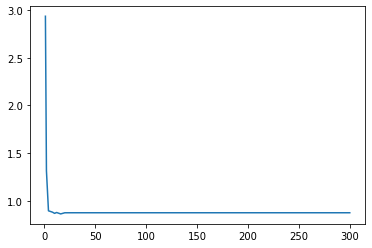

In [49]:
plt.plot(max_depth_arr,MSEs)

In [50]:
MSEs = []
min_samples_split_arr = [2,4,8,10,12,16,20,30,50,100,200,300]

for min_samples_split in min_samples_split_arr:
  regressor = RandomForestRegressor(n_estimators = N_ESTIM,max_depth = MAX_DEPTH, min_samples_split = min_samples_split, random_state = 0)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  MSE = np.square(np.subtract(y_test,y_pred)).mean()
  MSEs.append(MSE*100)

In [51]:
MSEs

[0.8596364894815081,
 0.8789416821608045,
 0.8981329313454425,
 0.8873364382709097,
 0.8918509113046573,
 0.9119594764485048,
 0.9293113538457536,
 0.999337551998266,
 1.0603912740785268,
 1.9612181206671884,
 2.1999190763073013,
 7.624781888276713]

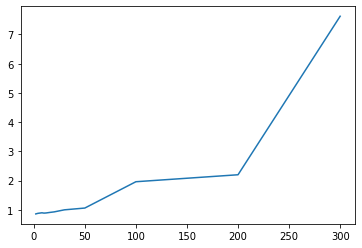

In [52]:
plt.plot(min_samples_split_arr,MSEs)